In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [ ]:
df = pd.read_csv("customer_signups.csv") # load dataset
df.head() # view the first few rows

,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
0,CUST00000,Joshua Bryant,NaN,NaN,Instagram,NaN,basic,No,34,Female
1,CUST00001,Nicole Stewart,nicole1@example.com,02-01-24,LinkedIn,West,basic,Yes,29,Male
2,CUST00002,Rachel Allen,rachel2@example.com,03-01-24,Google,North,PREMIUM,Yes,34,Non-Binary
3,CUST00003,Zachary Sanchez,zachary3@mailhub.org,04-01-24,YouTube,NaN,Pro,No,40,Male
4,CUST00004,NaN,matthew4@mailhub.org,05-01-24,LinkedIn,West,Premium,No,25,Other


In [ ]:
# info for the dataset
df.info()
df.describe(include='all')
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       298 non-null    object
 1   name              291 non-null    object
 2   email             266 non-null    object
 3   signup_date       298 non-null    object
 4   source            291 non-null    object
 5   region            270 non-null    object
 6   plan_selected     292 non-null    object
 7   marketing_opt_in  290 non-null    object
 8   age               288 non-null    object
 9   gender            292 non-null    object
dtypes: object(10)
memory usage: 23.6+ KB


customer_id          2
name                 9
email               34
signup_date          2
source               9
region              30
plan_selected        8
marketing_opt_in    10
age                 12
gender               8
dtype: int64

In [ ]:
# change signup date to proper format
df['signup_date'] = pd.to_datetime(df['signup_date'], errors='coerce')

In [ ]:
# checking that it worked, it did
df.head()

,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
0,CUST00000,Joshua Bryant,NaN,NaT,Instagram,NaN,basic,No,34,Female
1,CUST00001,Nicole Stewart,nicole1@example.com,2024-02-01,LinkedIn,West,basic,Yes,29,Male
2,CUST00002,Rachel Allen,rachel2@example.com,2024-03-01,Google,North,PREMIUM,Yes,34,Non-Binary
3,CUST00003,Zachary Sanchez,zachary3@mailhub.org,2024-04-01,YouTube,NaN,Pro,No,40,Male
4,CUST00004,NaN,matthew4@mailhub.org,2024-05-01,LinkedIn,West,Premium,No,25,Other


In [11]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df.head()

,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
0,CUST00000,Joshua Bryant,NaN,NaT,Instagram,NaN,basic,No,34.0,Female
1,CUST00001,Nicole Stewart,nicole1@example.com,2024-02-01,LinkedIn,West,basic,Yes,29.0,Male
2,CUST00002,Rachel Allen,rachel2@example.com,2024-03-01,Google,North,PREMIUM,Yes,34.0,Non-Binary
3,CUST00003,Zachary Sanchez,zachary3@mailhub.org,2024-04-01,YouTube,NaN,Pro,No,40.0,Male
4,CUST00004,NaN,matthew4@mailhub.org,2024-05-01,LinkedIn,West,Premium,No,25.0,Other


In [12]:
# standardising the text values, so it wont be Premium and PREMIUM and just instead be one consistent thing
df['plan_selected'] = df['plan_selected'].str.strip().str.capitalize()
df['gender'] = df['gender'].str.strip().str.capitalize()
df['marketing_opt_in'] = df['marketing_opt_in'].str.strip().str.capitalize()
df['source'] = df['source'].str.strip().str.capitalize()
df.head()

,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
0,CUST00000,Joshua Bryant,NaN,NaT,Instagram,NaN,Basic,No,34.0,Female
1,CUST00001,Nicole Stewart,nicole1@example.com,2024-02-01,Linkedin,West,Basic,Yes,29.0,Male
2,CUST00002,Rachel Allen,rachel2@example.com,2024-03-01,Google,North,Premium,Yes,34.0,Non-binary
3,CUST00003,Zachary Sanchez,zachary3@mailhub.org,2024-04-01,Youtube,NaN,Pro,No,40.0,Male
4,CUST00004,NaN,matthew4@mailhub.org,2024-05-01,Linkedin,West,Premium,No,25.0,Other


In [14]:
df = df.drop_duplicates(subset='customer_id', keep='first')  # remove duplicates based on customer_id

In [ ]:
# this shows the number of missing values in each column
df.isnull().sum()

customer_id          1
name                 9
email               34
signup_date          6
source               9
region              30
plan_selected        8
marketing_opt_in    10
age                 19
gender               8
dtype: int64

In [18]:
# Drop rows for missing critical data
df = df.dropna(subset=['customer_id', 'signup_date'])

# Fill missing 'source', 'region', 'plan_selected', 'gender' with 'Unknown'
for col in ['source', 'region', 'plan_selected', 'gender']:
    df[col] = df[col].fillna('Unknown')

# Fix inconsistent plan_selected values
df['plan_selected'] = df['plan_selected'].replace({'Unknownplan': 'Unknown'})

# Fill missing 'marketing_opt_in' with 'No'
df['marketing_opt_in'] = df['marketing_opt_in'].fillna('No')

# Fill missing 'age' with median age
median_age = df['age'].median()
df['age'] = df['age'].fillna(median_age)

# Fill missing 'email' and 'name' with placeholders to maintain data integrity
df['email'] = df['email'].fillna('unknown@unknown.com')
df['name'] = df['name'].fillna('Unknown')

In [20]:
df.tail(20)  # view the cleaned dataset

,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
279,CUST00279,Don Doyle,unknown@unknown.com,2024-06-10,Youtube,Central,Pro,Yes,40.0,Other
280,CUST00280,Maria Henry,maria80@example.com,2024-07-10,Instagram,South,Pro,Yes,34.0,Male
281,CUST00281,Andrew Parks,andrew81@inboxmail.net,2024-08-10,Youtube,Central,Basic,Yes,47.0,Male
282,CUST00282,Taylor Dawson,taylor82@example.com,2024-09-10,Linkedin,North,Basic,No,25.0,Male
283,CUST00283,Tiffany Ellison,tiffany83@mailhub.org,2024-10-10,Google,East,Pro,No,25.0,Female
284,CUST00284,Chad Nguyen,chad84@inboxmail.net,2024-11-10,Unknown,South,Premium,Yes,53.0,Other
285,CUST00285,Daniel Tate,daniel85@mailhub.org,2024-12-10,Instagram,North,Basic,Yes,29.0,Female
286,CUST00286,Bethany Campbell,bethany86@mailhub.org,2024-10-13,Google,North,Premium,Yes,21.0,Male
288,CUST00288,Ashley Sims MD,unknown@unknown.com,2024-10-15,Youtube,South,Basic,Yes,25.0,Female
289,CUST00289,Daniel Dunn,daniel89@example.com,2024-10-16,Referral,West,Basic,No,34.0,Male


In [21]:
# this shows the number of missing values in each column
df.isnull().sum()

customer_id         0
name                0
email               0
signup_date         0
source              0
region              0
plan_selected       0
marketing_opt_in    0
age                 0
gender              0
dtype: int64

In [22]:
# Group by the week of signup_date, count customers per week
signups_per_week = df.groupby(df['signup_date'].dt.to_period('W')).size().reset_index(name='signups')

# Convert Period back to string for better readability
signups_per_week['signup_week'] = signups_per_week['signup_date'].astype(str)

# Show results
signups_per_week[['signup_week', 'signups']]

,signup_week,signups
0,2024-01-01/2024-01-07,6
1,2024-01-08/2024-01-14,5
2,2024-01-15/2024-01-21,7
3,2024-01-22/2024-01-28,7
4,2024-01-29/2024-02-04,8
5,2024-02-05/2024-02-11,6
6,2024-02-12/2024-02-18,6
7,2024-02-19/2024-02-25,7
8,2024-02-26/2024-03-03,7
9,2024-03-04/2024-03-10,7


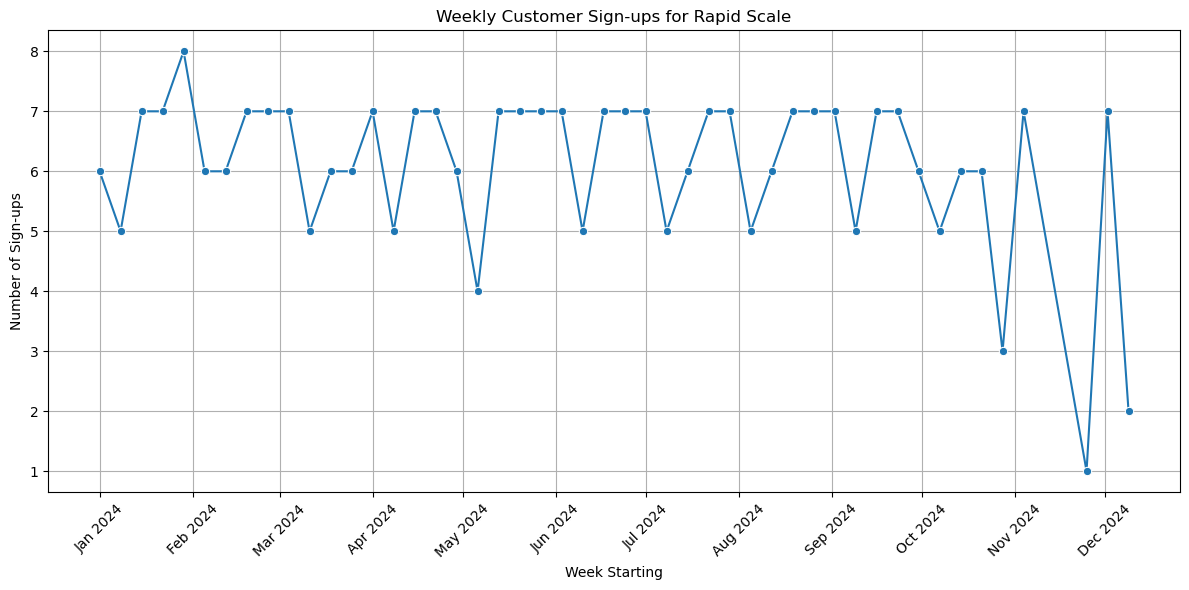

In [24]:
# Plotting the weekly sign-ups

signups_per_week['start_date'] = signups_per_week['signup_week'].str.split('/').str[0]
signups_per_week['start_date'] = pd.to_datetime(signups_per_week['start_date'])

plt.figure(figsize=(12,6))
sns.lineplot(data=signups_per_week, x='start_date', y='signups', marker='o')

plt.title('Weekly Customer Sign-ups for Rapid Scale')
plt.xlabel('Week Starting')
plt.ylabel('Number of Sign-ups')
plt.grid(True)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


/var/folders/31/vqxx2fgx1wv6bzyzgc3tf9zr0000gn/T/ipykernel_27368/1487678415.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plan_counts, x='plan_selected', y='signups', palette='pastel')


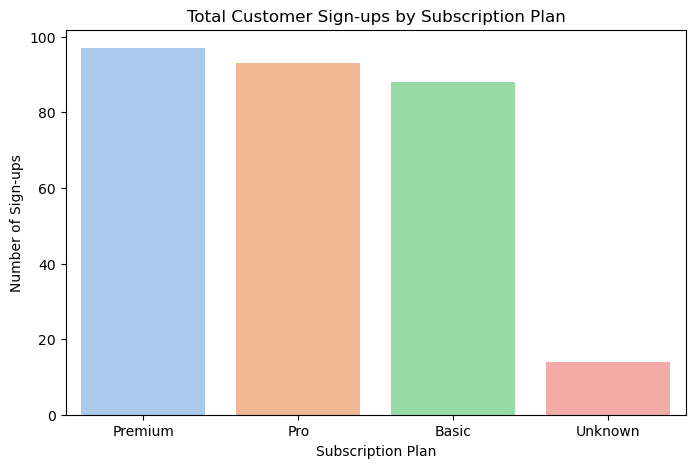

In [ ]:
# Signups by Subscription Plan
plan_counts = df['plan_selected'].value_counts().reset_index()
plan_counts.columns = ['plan_selected', 'signups']

plt.figure(figsize=(8,5))
sns.barplot(data=plan_counts, x='plan_selected', y='signups', palette='pastel')
plt.title('Total Customer Sign-ups by Subscription Plan')
plt.xlabel('Subscription Plan')
plt.ylabel('Number of Sign-ups')
plt.show()

/var/folders/31/vqxx2fgx1wv6bzyzgc3tf9zr0000gn/T/ipykernel_27368/1879529008.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_counts, x='region', y='signups', palette='muted')


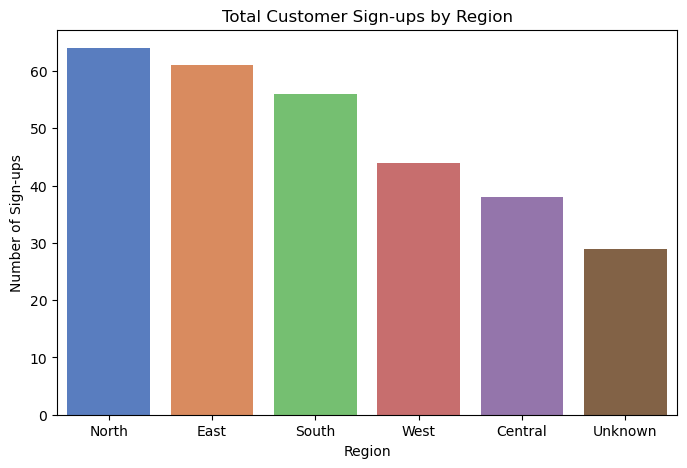

In [ ]:
# Signups by region
region_counts = df['region'].value_counts().reset_index()
region_counts.columns = ['region', 'signups']

plt.figure(figsize=(8,5))
sns.barplot(data=region_counts, x='region', y='signups', palette='muted')
plt.title('Total Customer Sign-ups by Region')
plt.xlabel('Region')
plt.ylabel('Number of Sign-ups')
plt.show()

/var/folders/31/vqxx2fgx1wv6bzyzgc3tf9zr0000gn/T/ipykernel_27368/3213750449.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=source_counts, x='source', y='signups', palette='bright')


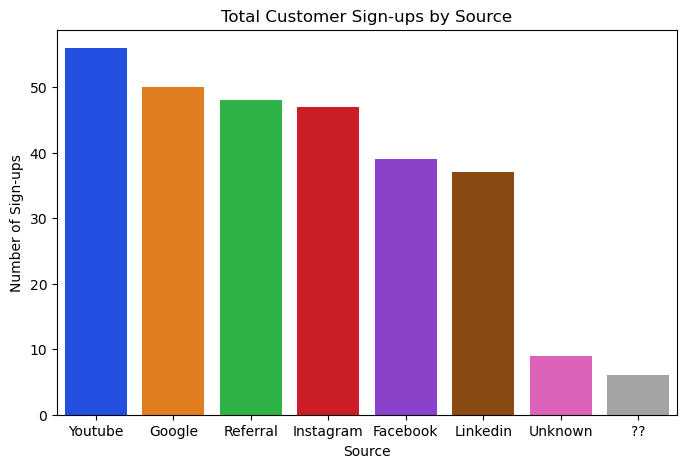

In [29]:
# Signups by Source
source_counts = df['source'].value_counts().reset_index()
source_counts.columns = ['source', 'signups']

plt.figure(figsize=(8,5))
sns.barplot(data=source_counts, x='source', y='signups', palette='bright')
plt.title('Total Customer Sign-ups by Source')
plt.xlabel('Source')
plt.ylabel('Number of Sign-ups')
plt.show()

Marketing Opt-In Counts by Gender:
marketing_opt_in  Nil  No  Yes
gender                        
123                 0   3    3
Female              0  47   41
Male                1  53   36
Non-binary          0  23   18
Other               0  35   24
Unknown             0   4    4


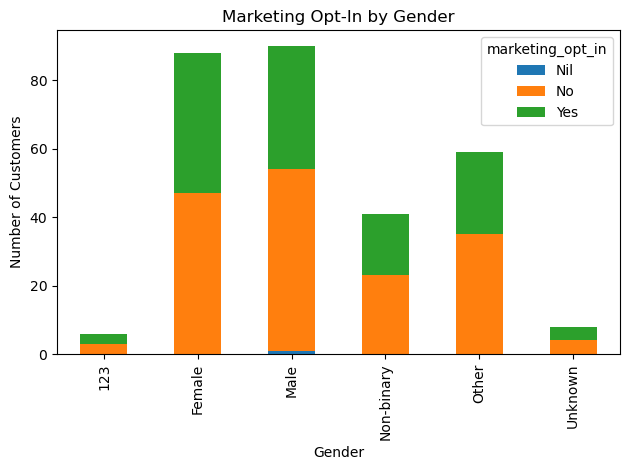

In [33]:
# Marketing Opt-In Counts by Gender
marketing_by_gender = df.groupby(['gender', 'marketing_opt_in']).size().unstack(fill_value=0)
print("Marketing Opt-In Counts by Gender:")
print(marketing_by_gender)

marketing_by_gender.plot(kind='bar', stacked=True, title='Marketing Opt-In by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

In [35]:
# Age Summary
age_summary = {
    'Minimum age': df['age'].min(),
    'Maximum age': df['age'].max(),
    'Mean age': df['age'].mean(),
    'Median age': df['age'].median(),
    'Missing values': df['age'].isnull().sum()
}

print("Age Summary:")
for k, v in age_summary.items():
    print(f"{k}: {v}")

Age Summary:
Minimum age: 21.0
Maximum age: 206.0
Mean age: 36.10958904109589
Median age: 34.0
Missing values: 0


/var/folders/31/vqxx2fgx1wv6bzyzgc3tf9zr0000gn/T/ipykernel_27368/3729096811.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  opt_in_by_age = df.groupby('age_group')['marketing_opt_in'].value_counts(normalize=True).unstack().fillna(0)
/var/folders/31/vqxx2fgx1wv6bzyzgc3tf9zr0000gn/T/ipykernel_27368/3729096811.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=opt_in_by_age.index, y=opt_in_by_age['Opt-in Rate (%)'], palette='Blues_d')


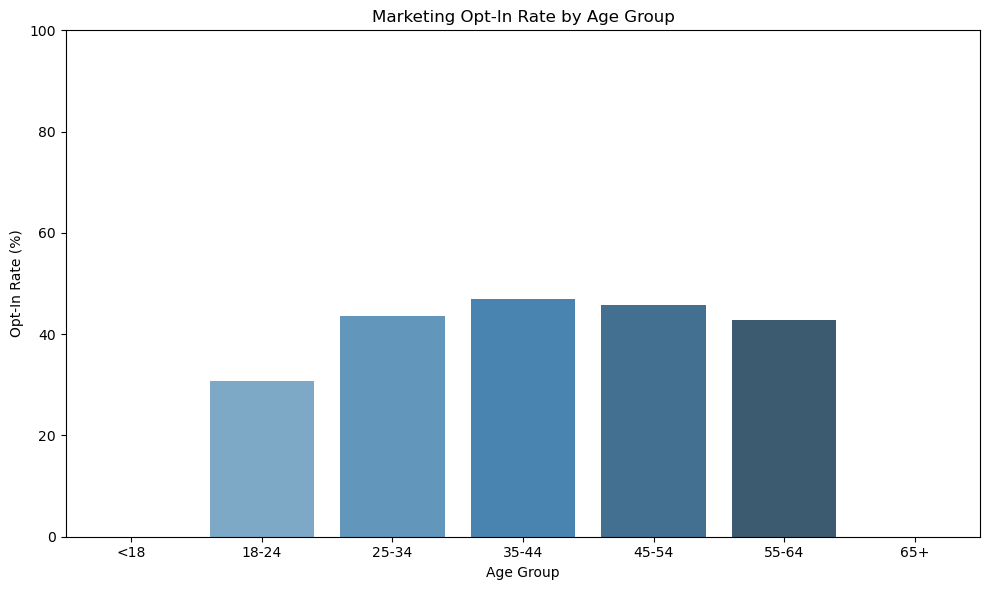

In [36]:
# Marketing Opt-In rates by age group

# Define age bins and labels
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
age_labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']

df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Calculate opt-in rates by age group
opt_in_by_age = df.groupby('age_group')['marketing_opt_in'].value_counts(normalize=True).unstack().fillna(0)
opt_in_by_age['Opt-in Rate (%)'] = opt_in_by_age['Yes'] * 100

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=opt_in_by_age.index, y=opt_in_by_age['Opt-in Rate (%)'], palette='Blues_d')
plt.title('Marketing Opt-In Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Opt-In Rate (%)')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

In [37]:
plan_counts = df['plan_selected'].value_counts().reset_index()
plan_counts.columns = ['plan_selected', 'signups']

# Group by age group and plan, count signups
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
age_labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Count signups by age group and plan
plan_by_age = df.groupby(['age_group', 'plan_selected']).size().reset_index(name='signups')

# For each age group, get the most common plan
most_common_plan_by_age = plan_by_age.loc[plan_by_age.groupby('age_group')['signups'].idxmax()]

print("Most common plan overall:", df['plan_selected'].mode()[0])
print("Most common plan by age group:")
print(most_common_plan_by_age[['age_group', 'plan_selected', 'signups']])

Most common plan overall: Premium
Most common plan by age group:
   age_group plan_selected  signups
0        <18         Basic        0
6      18-24           Pro       12
8      25-34         Basic       51
13     35-44       Premium       23
18     45-54           Pro       17
20     55-64         Basic        5
24       65+         Basic        0


/var/folders/31/vqxx2fgx1wv6bzyzgc3tf9zr0000gn/T/ipykernel_27368/2773665377.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plan_by_age = df.groupby(['age_group', 'plan_selected']).size().reset_index(name='signups')
/var/folders/31/vqxx2fgx1wv6bzyzgc3tf9zr0000gn/T/ipykernel_27368/2773665377.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  most_common_plan_by_age = plan_by_age.loc[plan_by_age.groupby('age_group')['signups'].idxmax()]
